Dataset - https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023

This is an ongoing project. Data wrangling and EDA based on popular video games between 1980 and 2023.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [4]:
# Reading the csv into a dataframe
df = pd.read_csv("/kaggle/input/popular-video-games-1980-2023/games.csv")

# Display first 10 rows
df.head(10)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
5,5,Minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,1.8K,1.1K,230
6,6,Omori,"Dec 25, 2020","['OMOCAT', 'PLAYISM']",4.2,1.6K,1.6K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A turn-based surreal horror RPG in which a chi...,"[""The best game I've played in my life"", ""omor...",7.2K,1.1K,4.5K,3.8K
7,7,Metroid Dread,"Oct 07, 2021","['Nintendo', 'MercurySteam']",4.3,2.1K,2.1K,"['Adventure', 'Platform']",Join intergalactic bounty hunter Samus Aran in...,['Have only been a Metroid fan for couple of y...,9.2K,759,3.4K,3.3K
8,8,Among Us,"Jun 15, 2018",['InnerSloth'],3.0,867,867,"['Indie', 'Strategy']",Join your crew-mates in a multiplayer game of ...,"[""it's a solid party game. i'm bad at lying th...",25K,470,776,126
9,9,NieR: Automata,"Feb 23, 2017","['PlatinumGames', 'Square Enix']",4.3,2.9K,2.9K,"['Brawler', 'RPG']","NieR: Automata tells the story of androids 2B,...","['Holy shit', 'im carrying the weight of the w...",18K,1.1K,6.2K,3.6K


In [5]:
df.shape

(1512, 14)

In [6]:
df.info()  # Display summary information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [7]:
#Check for null values
df.isna().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [8]:
#Display all null values
df[df.isna().any(axis=1)]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
1202,1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0,1,103,529


In [9]:
# Drop all null values
df.dropna(inplace=True)

In [10]:
df.shape

(1498, 14)

In [11]:
#Drop columns that are not required for the analysis

column_drop = ['Summary', 'Reviews', 'Unnamed: 0']
df = df.drop(column_drop, axis=1)

In [12]:
#Check for duplicate rows

df.duplicated().sum()

392

In [13]:
#Display duplicate rows

df[df.duplicated() == True].head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
326,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
327,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
328,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K
329,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,679,4.9K,1.8K
330,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K


In [14]:
df.shape

(1498, 11)

In [15]:
#Display duplicate rows

duplicate_titles = ['Elden Ring', 'Hades', 'The Legend of Zelda: Breath of the Wild','Undertale','Hollow Knight']
duplicate_titles_df = df[df['Title'].isin(duplicate_titles)].sort_values('Title')
duplicate_titles_df

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
326,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
776,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
327,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
777,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K
330,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K
780,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K


In [16]:
# Drop all duplicate rows

df.drop_duplicates(inplace=True)  

In [17]:
df.shape

(1106, 11)

In [18]:
# Drop rows with release date as 'to be decided'

release_drop = df["Release Date"] == "releases on TBD"

In [19]:
df.drop(df[release_drop].index, inplace=True)
df["Release Date"] = pd.to_datetime(df["Release Date"])

In [20]:
# Renaming the columns

rename_columns = {"Plays":"Total Plays", "Playing":"Active Players"}

df.rename(columns=rename_columns, inplace=True)

df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Total Plays,Active Players,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,679,4.9K,1.8K
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K


In [21]:
col_num = ['Times Listed', 'Number of Reviews', 'Total Plays', 'Active Players', 'Backlogs', 'Wishlist']
for col in col_num:
    df[col] = df[col].str.replace("K", "000", regex=False).str.replace(".", "").astype('int')

/tmp/ipykernel_32/4162973112.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace("K", "000", regex=False).str.replace(".", "").astype('int')


In [22]:
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Total Plays,Active Players,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,39000,39000,"['Adventure', 'RPG']",17000,38000,46000,48000
1,Hades,2019-12-10,['Supergiant Games'],4.3,29000,29000,"['Adventure', 'Brawler', 'Indie', 'RPG']",21000,32000,63000,36000
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,43000,43000,"['Adventure', 'RPG']",30000,25000,5000,26000
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,35000,35000,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28000,679,49000,18000
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",21000,24000,83000,23000


In [23]:
df['Genres'] = df['Genres'].apply(ast.literal_eval)
df['Team'] = df['Team'].apply(ast.literal_eval)

In [24]:
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Total Plays,Active Players,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"[Bandai Namco Entertainment, FromSoftware]",4.5,39000,39000,"[Adventure, RPG]",17000,38000,46000,48000
1,Hades,2019-12-10,[Supergiant Games],4.3,29000,29000,"[Adventure, Brawler, Indie, RPG]",21000,32000,63000,36000
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"[Nintendo, Nintendo EPD Production Group No. 3]",4.4,43000,43000,"[Adventure, RPG]",30000,25000,5000,26000
3,Undertale,2015-09-15,"[tobyfox, 8-4]",4.2,35000,35000,"[Adventure, Indie, RPG, Turn Based Strategy]",28000,679,49000,18000
4,Hollow Knight,2017-02-24,[Team Cherry],4.4,3000,3000,"[Adventure, Indie, Platform]",21000,24000,83000,23000


In [25]:
# Count the occurrences of each genre 
all_genres = [genre for genres_list in df['Genres'] for genre in genres_list]
genre_counts = pd.Series(all_genres).value_counts()
genre_counts

Adventure              717
RPG                    359
Shooter                260
Platform               241
Indie                  205
Puzzle                 131
Strategy               116
Brawler                104
Simulator               94
Turn Based Strategy     71
Fighting                64
Arcade                  60
Visual Novel            53
Tactical                42
Racing                  37
Point-and-Click         36
Music                   20
Sport                   20
Card & Board Game       13
Real Time Strategy       9
Quiz/Trivia              3
MOBA                     2
Pinball                  1
dtype: int64

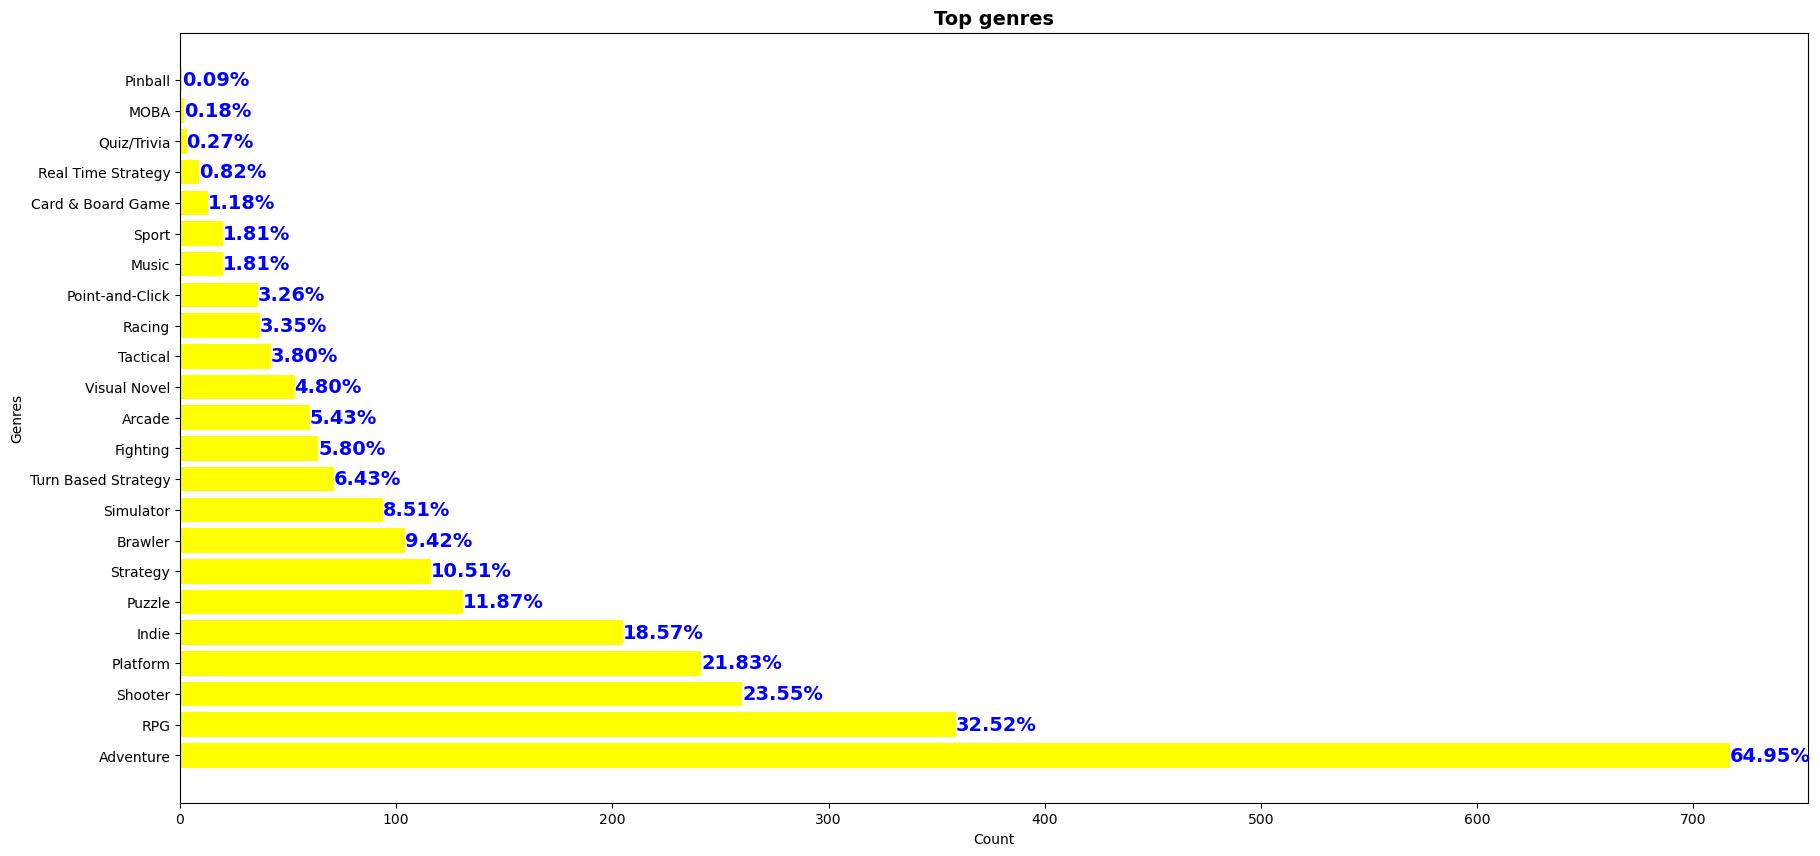

In [26]:
# Find the top genres

total_count = len(df)  
percentage = (genre_counts / total_count) * 100

fig, ax = plt.subplots(figsize=(21, 10))
ax.barh(genre_counts.index, genre_counts.values, color='yellow')

for i, v in enumerate(genre_counts.values):
    ax.text(v, i, f'{percentage[i]:.2f}%', color='blue', ha='left', va='center', fontsize=14, weight='bold')

ax.set_title("Top genres", fontsize=14, weight='bold')
ax.set_xlabel("Count")
ax.set_ylabel("Genres")

plt.show()

In [27]:
# Count the occurrences of each team 
all_teams = [team for team_list in df['Team'] for team in team_list]
team_counts = pd.Series(all_teams).value_counts()
team_counts = team_counts.nlargest(30) #Visualize top 30 teams
team_counts

Nintendo                                    173
Capcom                                       64
Square Enix                                  57
Sega                                         45
Electronic Arts                              42
Konami                                       31
Activision                                   30
Ubisoft Entertainment                        27
Atlus                                        26
Bandai Namco Entertainment                   26
Sony Interactive Entertainment               24
Nintendo EAD                                 22
Game Freak                                   20
Square                                       18
Sony Computer Entertainment                  18
Bethesda Softworks                           17
WB Games                                     17
Sonic Team                                   16
Ubisoft Montreal                             16
Devolver Digital                             15
FromSoftware                            

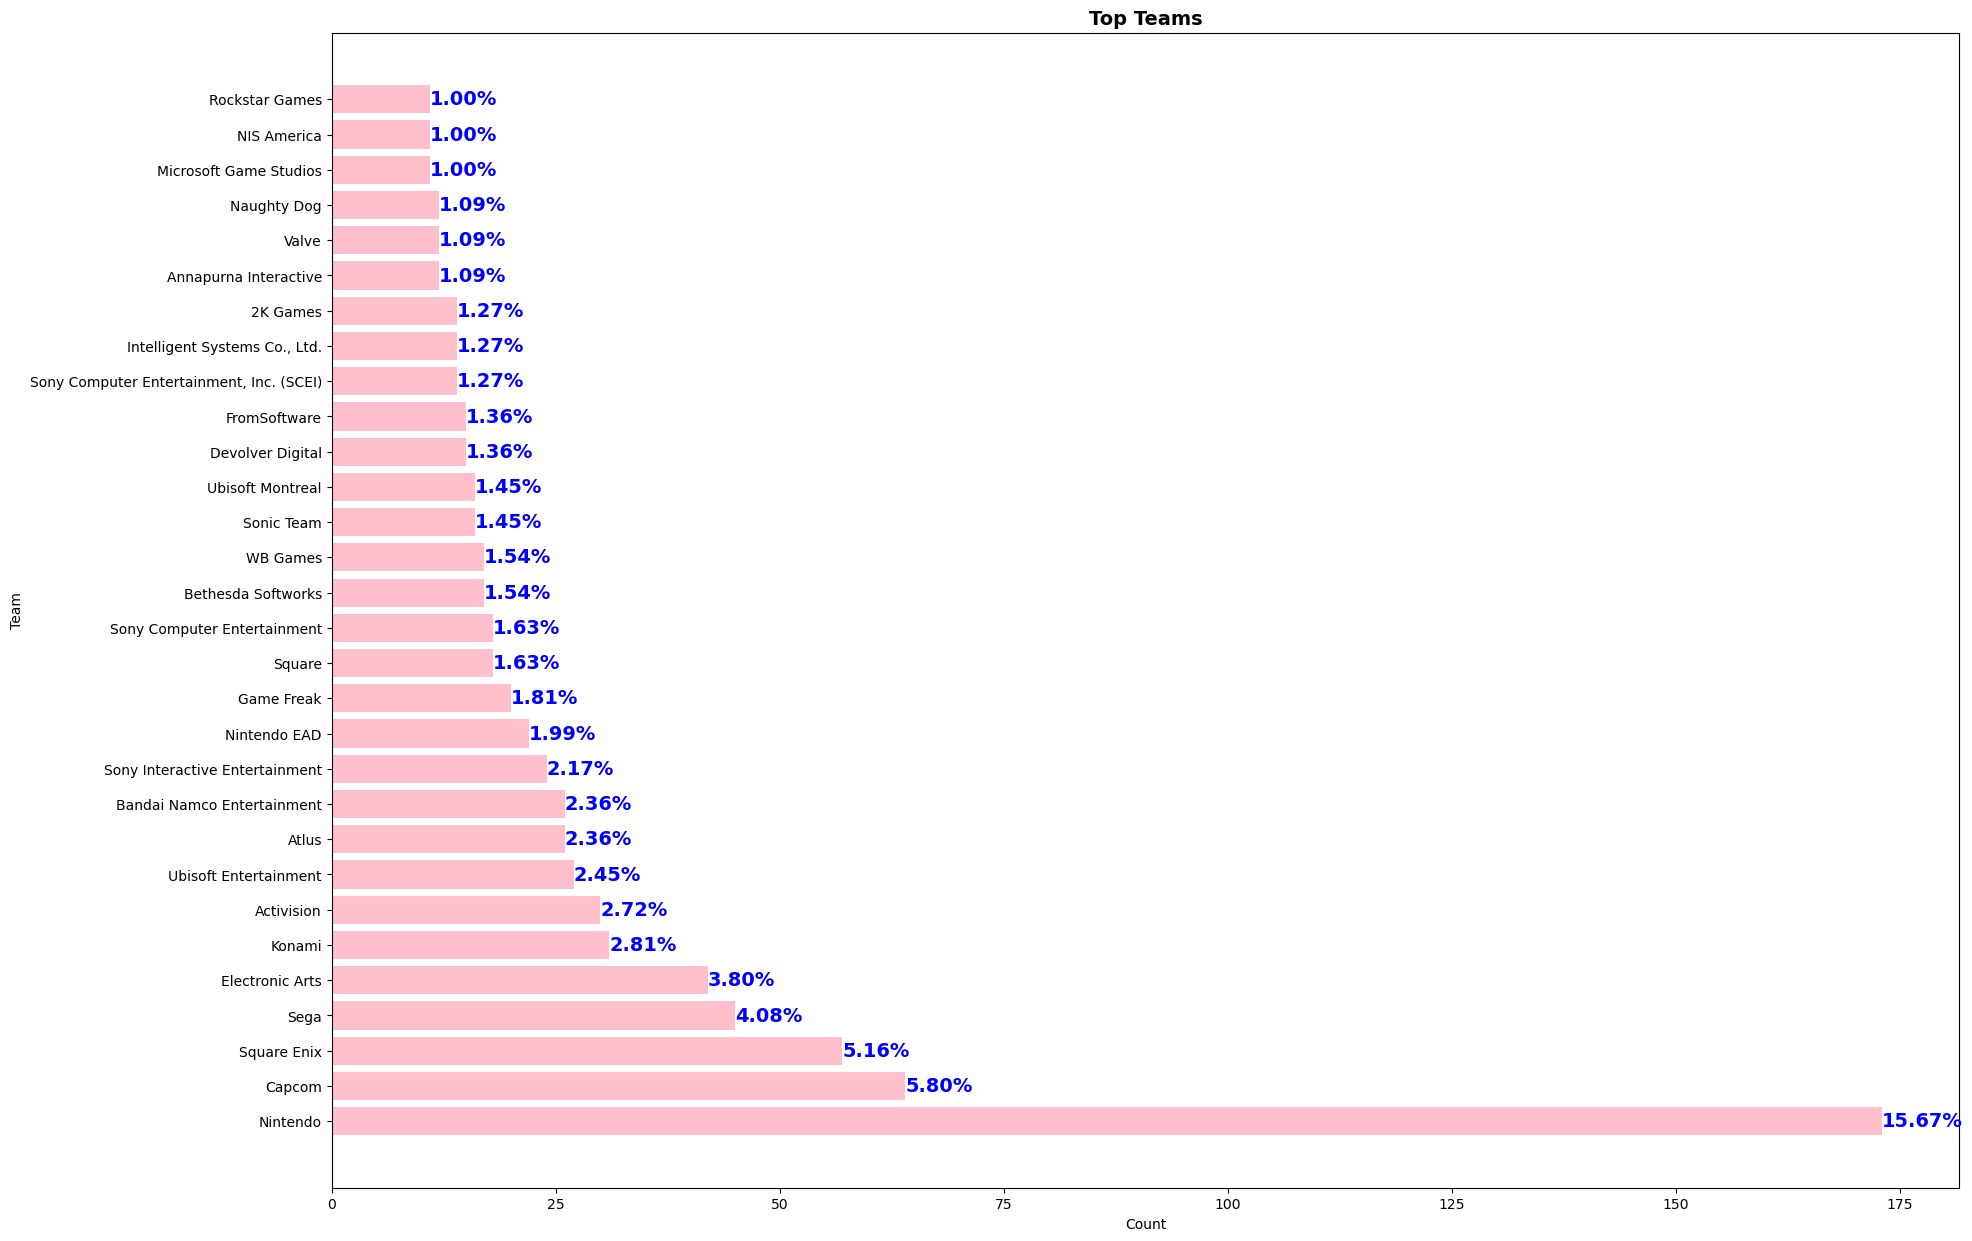

In [28]:
# Find the top teams

total_count = len(df)  
percentage = ( team_counts / total_count) * 100

fig, ax = plt.subplots(figsize=(21, 15))
ax.barh(team_counts.index, team_counts.values, color='pink')

for i, v in enumerate(team_counts.values):
    ax.text(v, i, f'{percentage[i]:.2f}%', color='blue', ha='left', va='center', fontsize=14, weight='bold')

ax.set_title("Top Teams", fontsize=14, weight='bold')
ax.set_xlabel("Count")
ax.set_ylabel("Team")

plt.show()

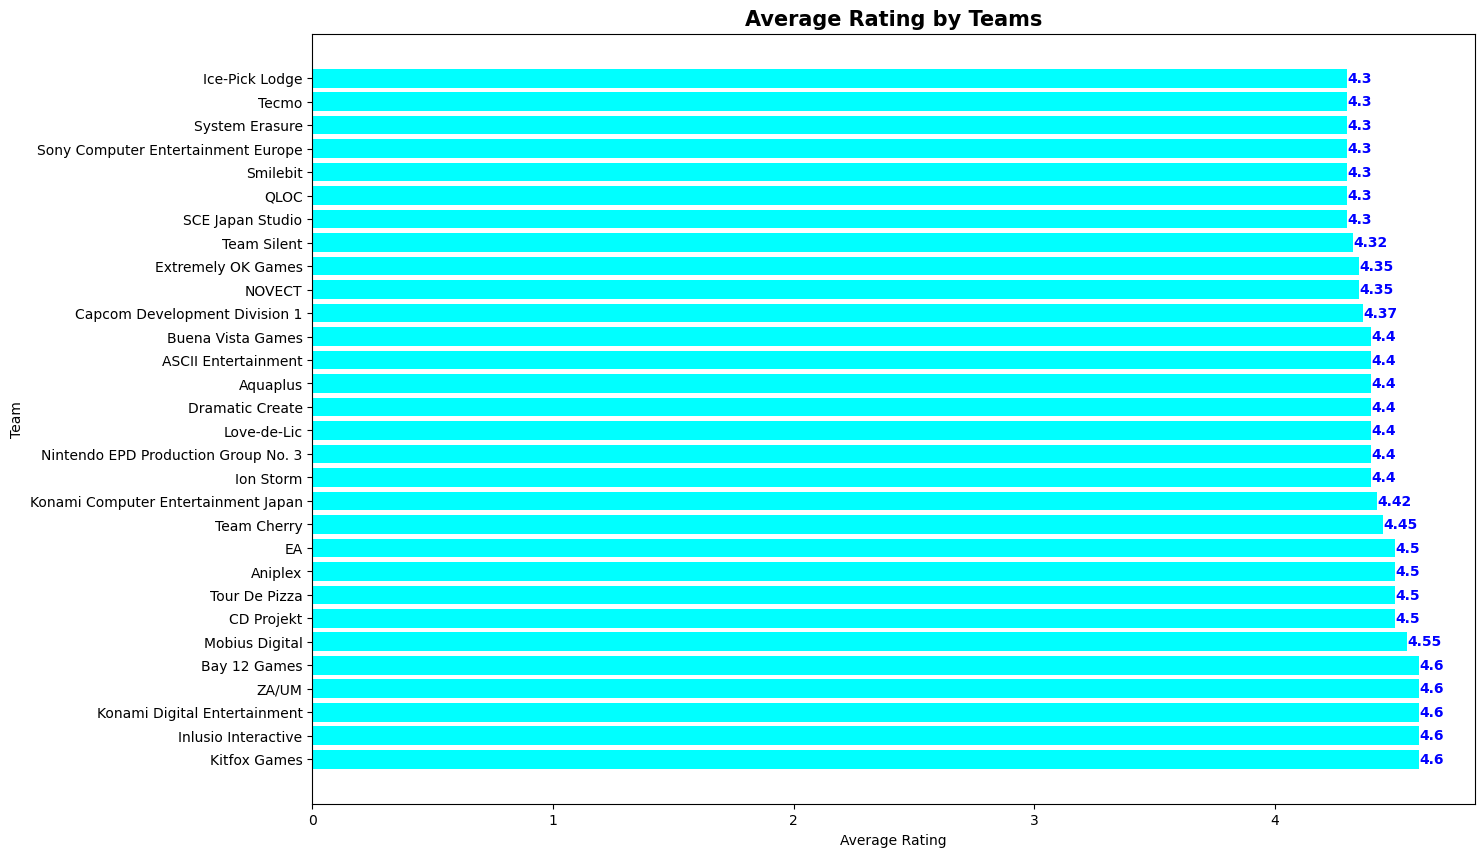

In [40]:
team_avg_ratings = df.explode('Team').groupby('Team')['Rating'].mean().sort_values(ascending=False)

# Plot the average ratings by team
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(team_avg_ratings[:30].index, team_avg_ratings[:30].values, color='aqua')
ax.set_title("Average Rating by Teams", fontsize=15, weight='bold')
ax.set_xlabel("Average Rating")
ax.set_ylabel("Team")

for i, v in enumerate(team_avg_ratings[:30].values):
    ax.text(v, i, str(round(v, 2)), color="blue", ha="left", va="center", fontsize=10, weight='bold')

plt.show()


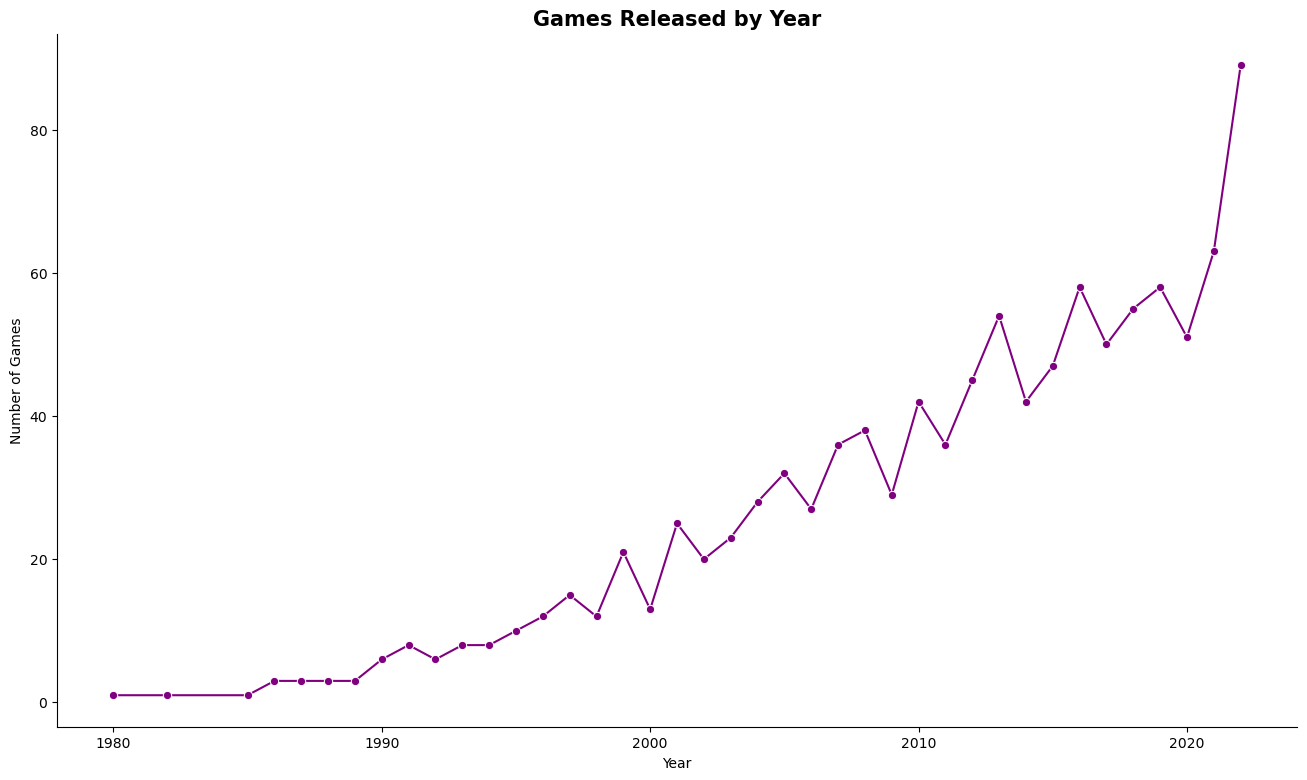

In [43]:
# Extract year and month from the 'Release Date' column
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month_name()

# Count the number of games released each year
year_counts = df[df['Year'] != 2023]['Year'].value_counts().sort_index()

# Count the number of games released each month
month_counts = df[df['Year'] != 2023]['Month'].value_counts().sort_index()

# Visualize the number of games released by year
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='purple')
ax.set_title("Games Released by Year", fontsize=15, weight='bold')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Games")
sns.despine()
plt.show()


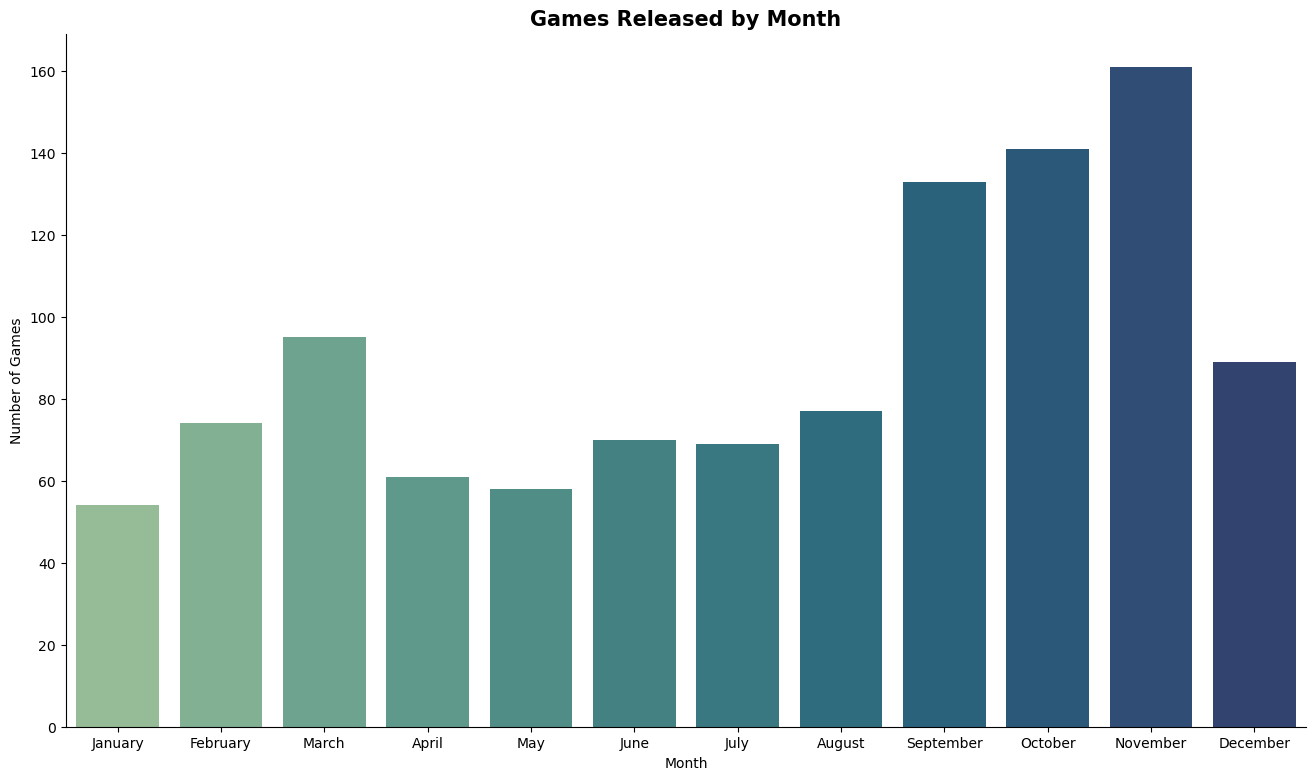

In [44]:
# Sort the month counts by month index
import calendar
month_counts_sorted = month_counts.reindex(index=calendar.month_name[1:])

# Visualize the number of games released by month
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=month_counts_sorted.index, y=month_counts_sorted.values, palette='crest')
ax.set_title("Games Released by Month", fontsize=15, weight='bold')
ax.set_xlabel("Month")
ax.set_ylabel("Number of Games")
sns.despine()
plt.show()

In [ ]:
# df.to_csv('Game_Analysis.csv')